In [1]:
#пусть 0 это решка , 1 это орел
# H_0 : p =1/2
# H_1 : p !=1/2

In [83]:
import itertools
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def sample(k):
    u = [[0]*10*k ,[1]*11*k]
    u = list(itertools.chain.from_iterable(u))
    return u

In [115]:
chi_p_val =[]
wald_p_val = []
x = []
for k in range(50,100,2): #четное , чтобы частоты в хи_квадрат были равные
    s = sample(k)
    #chi_square_test
    f1 = s.count(0)
    f2 = s.count(1)
    N = f1 +f2
    chi , p_val =  stats.chisquare([f1,f2], f_exp=[N/2, N/2])
    chi_p_val.append(p_val)
    #wald_test
    theta = np.mean(s) - 1/2
    sigma  = np.sqrt(np.var(s)/len(s))
    p_val_wald = 2*(1-stats.norm.cdf(theta/sigma))
    wald_p_val.append( p_val_wald)
    #x-coordinate 
    x.append(k*21)

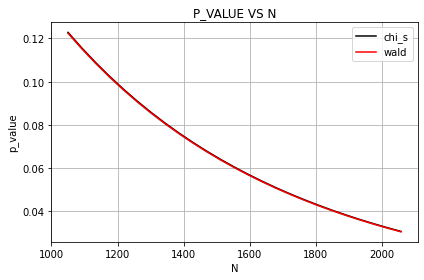

In [116]:
plt.plot(x, chi_p_val, label="Training score", color="black")
plt.plot(x, wald_p_val, label="Training score", color="red")
# Create plot
plt.legend(["chi_s" ,"wald"] )
plt.title("P_VALUE VS N")
plt.xlabel("N")
plt.ylabel("p_value")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#выглядит почти что идентично , так как хи_квадрат расчитывается через квадратичную формулу посчитаем N 
#для произвольного P_VAL

In [125]:
#chi_square = N/441 

In [ ]:
def Numero(pv):
    N = 441 *stats.chi2.ppf(1-pv, 1)
    return N

In [ ]:
Numero(0.05)

In [127]:
Numero(0.05)

1694.0833399261087